<h1>SEM5 CS3<h1>
<h2>18BCS6212<h2>


In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
#Importing our training data and validation data
digits_train = pd.read_csv(r'C:\Users\lenovo\Downloads\train.csv')
digits_validation = pd.read_csv(r'C:\Users\lenovo\Downloads\test.csv')

In [3]:
digits_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digits_train.shape

(42000, 785)

In [5]:
digits_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
#Looking for null values.
digits_train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

<h4>No NULL value found!<h4>

In [7]:
digits_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [8]:
order = list(np.sort(digits_train['label'].unique()))
print(order)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


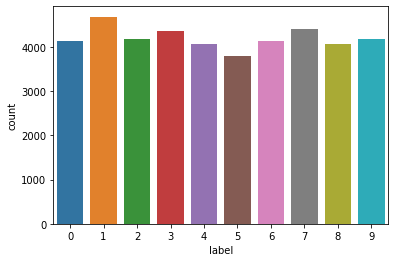

In [9]:
sns.countplot(digits_train["label"])

In [10]:
#avg the feature
round(digits_train.drop('label' , axis=1).mean(),2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

<h3>Splitting the data<h3>

In [11]:
# splititng into x and y
X = digits_train.drop(['label'],axis =1 )
y = digits_train['label']

In [12]:
#Normalise and scaling
X = X/255.0
digits_validation = digits_validation/255.0
X_scale = scale(X)

In [13]:
X_train , X_test , y_train ,y_test = train_test_split(X_scale, y, train_size = 0.2, test_size = 0.1, random_state = 100)

<h3>Linear Model<h3>

In [14]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
# predict
y_pred = model_linear.predict(X_test)

In [16]:
# Confusion matrix and accuracy
# Accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9119047619047619 

[[415   0   3   0   0   3   5   0   0   0]
 [  0 429   3   2   1   0   0   0   3   0]
 [  4   8 373  12   6   2   6   7   4   2]
 [  1   2   9 374   0  11   0   2   8   0]
 [  0   1   6   1 358   1   2   4   2   9]
 [  1   5   2  19   4 358   3   0   4   4]
 [  1   0   5   1   2   4 389   1   0   0]
 [  3   3   4   4   9   0   0 387   2  19]
 [  1   8  15  12   2  26   3   0 357   7]
 [  4   1   2   5  22   2   0  26   4 390]]


<h4>Linear Model -- Accuracy = 91.19%<h4>

<h3>Non-Linear Model<h3>

In [17]:
# Using rbf kernel, C=1, default value of gamma
non_linear_model = SVC(kernel='rbf')
# Fit X_train, y_train in the model
non_linear_model.fit(X_train, y_train)
# Predict
y_pred = non_linear_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
# Confusion matrix and accuracy
# Accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9407142857142857 

[[414   0   0   1   1   3   4   1   2   0]
 [  0 427   3   5   1   0   0   0   2   0]
 [  4   0 401   1   1   1   3  10   1   2]
 [  0   2   5 386   0   8   0   1   5   0]
 [  0   0   2   0 362   1   3   6   2   8]
 [  0   3   3  10   4 367   5   6   2   0]
 [  1   0   3   0   0   3 394   1   1   0]
 [  2   1   2   0   4   0   0 410   3   9]
 [  0   6   7   6   3  17   2   3 380   7]
 [  1   1   2   6  13   2   0  18   3 410]]


<h4>Non-Linear Model -- Accuracy = 94.07%<h4>

<h3>Grid Search<h3>

In [19]:
# creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

In [20]:
# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
'C': [1, 10, 100, 1000]}]

In [21]:
# specify model
model = SVC(kernel="rbf")

In [22]:
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,param_grid = hyper_params, scoring= 'accuracy', cv = folds, verbose = 1, return_train_score=True)
# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 112.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [23]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,125.048956,8.729419,15.643778,0.053471,1,0.01,"{'C': 1, 'gamma': 0.01}",0.752381,0.745833,0.751190,...,0.751905,0.013423,12,0.999851,0.999851,0.999851,1.000000,1.000000,0.999911,0.000073
1,30.632272,0.141233,9.229242,0.039706,1,0.001,"{'C': 1, 'gamma': 0.001}",0.927381,0.926786,0.935714,...,0.927976,0.004141,4,0.972619,0.972321,0.972321,0.973363,0.975000,0.973125,0.001012
2,44.592693,0.121382,12.332290,0.038185,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.897619,0.892262,0.899405,...,0.898214,0.003346,8,0.913690,0.915476,0.912798,0.911012,0.914137,0.913423,0.001483
3,124.180789,1.299671,15.677429,0.070098,10,0.01,"{'C': 10, 'gamma': 0.01}",0.769643,0.762500,0.770238,...,0.768810,0.012825,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,26.249634,0.197251,8.372596,0.056292,10,0.001,"{'C': 10, 'gamma': 0.001}",0.935119,0.942857,0.944643,...,0.938452,0.004368,1,0.999405,0.999702,0.999554,0.999405,0.999702,0.999554,0.000133
5,20.513879,0.124446,7.744013,0.049306,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.916071,0.926190,0.933929,...,0.922262,0.006907,6,0.961012,0.959970,0.959673,0.961756,0.961756,0.960833,0.000875
6,124.255914,1.336576,15.700011,0.057593,100,0.01,"{'C': 100, 'gamma': 0.01}",0.769643,0.762500,0.770238,...,0.768810,0.012825,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,26.181099,0.196577,8.385277,0.035994,100,0.001,"{'C': 100, 'gamma': 0.001}",0.935119,0.943452,0.944643,...,0.938214,0.004797,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,15.442822,0.105799,6.443259,0.033065,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.917857,0.930357,0.929167,...,0.924524,0.005000,5,0.994792,0.994494,0.994048,0.995238,0.994792,0.994673,0.000393
9,124.424604,1.363662,15.688043,0.057476,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.769643,0.762500,0.770238,...,0.768810,0.012825,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [24]:
best_score = model_cv.best_score_
best_hyper = model_cv.best_params_

In [25]:
print(best_score)
print(best_hyper)

0.9384523809523809
{'C': 10, 'gamma': 0.001}


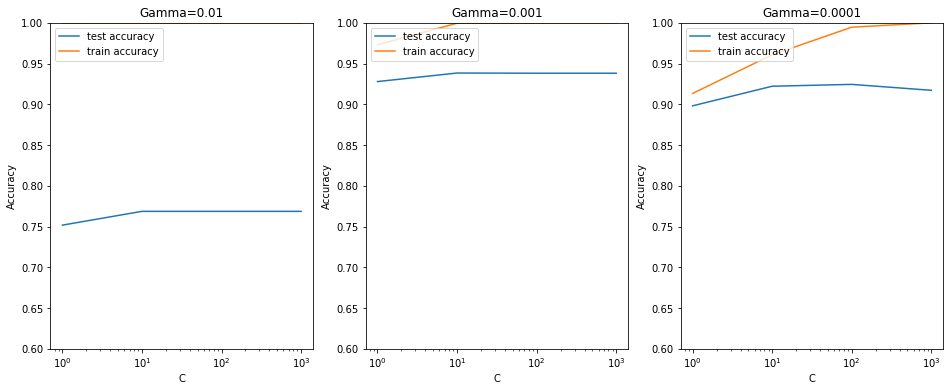

In [26]:
cv_results['param_C'] = cv_results['param_C'].astype('int')
# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]
plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]
plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [27]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

In [28]:
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))


The best test score is 0.9384523809523809 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [29]:
# model with optimal hyperparameters
# model
model = SVC(C=10, gamma=0.001, kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9488095238095238 

[[420   0   0   0   1   2   2   1   0   0]
 [  0 430   3   0   1   0   0   0   2   2]
 [  5   1 401   4   4   0   3   6   0   0]
 [  0   2   4 393   0   4   0   1   3   0]
 [  1   1   3   0 360   1   2   3   2  11]
 [  0   1   4  11   2 371   2   5   2   2]
 [  0   0   3   0   1   3 395   1   0   0]
 [  1   1   4   0   3   1   0 413   2   6]
 [  0   5   8   7   2  10   3   4 388   4]
 [  2   1   2   5  12   4   0  13   3 414]] 



<h4>Using Grid Search we achieved 94.88% accuracy.<h4>

<h3>Evaluating on Validation Dataset<h3>

In [30]:
submit_data = pd.read_csv(r'C:\Users\lenovo\Downloads\sample_submission.csv')

In [31]:
digits_validation = scale(digits_validation)

In [32]:
y_pred_validation = model.predict(digits_validation)

In [33]:
submit_data['predicted'] = y_pred_validation


In [34]:
submit_data.head()

,ImageId,Label,predicted
0,1,0,2
1,2,0,0
2,3,0,9
3,4,0,4
4,5,0,3


In [35]:
print("accuracy : {} ".format( metrics.accuracy_score(submit_data["Label"],submit_data["predicted"])))
print(metrics.confusion_matrix(submit_data["Label"],submit_data["predicted"]))

accuracy : 0.09928571428571428 
[[2780 3229 2812 2791 2781 2519 2748 3042 2575 2723]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]


<h4>Accuracy of 9.92% achieved which is very low!<h4>